# EDA

## Data Loading

In [1]:
from pathlib import Path

In [2]:
# loading data
data = Path('./data')
train_data = data / 'train.csv'
test_data = data / 'test.csv'

In [3]:
train_data = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
test_data = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

In [4]:
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
train_dfc = train_df.copy()
test_dfc = test_df.copy()

## Analysis

In [6]:
# checking the shape of the 2 datasets

print(f"Shape of train dataset: {train_df.shape}")
print(f"Shape of test dataset: {test_df.shape}")

Shape of train dataset: (614, 13)
Shape of test dataset: (367, 12)


In [7]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning

### for train dataset

In [12]:
# train_df['Gender'] = train_df['Gender'].astype(str).str.strip()
# train_df['Gender'] = train_df['Gender'].replace({'nan': np.nan, '': np.nan})

# train_df['Married'] = train_df['Married'].astype(str).str.strip()
# train_df['Married'] = train_df['Married'].replace({'nan': np.nan, '': np.nan})

# train_df['Education'] = train_df['Education'].astype(str).str.strip()
# train_df['Education'] = train_df['Education'].replace({'nan': np.nan, '': np.nan})

# train_df['Self_Employed'] = train_df['Self_Employed'].astype(str).str.strip()
# train_df['Self_Employed'] = train_df['Self_Employed'].replace({'nan': np.nan, '': np.nan})

# train_df['Property_Area'] = train_df['Property_Area'].astype(str).str.strip()
# train_df['Property_Area'] = train_df['Property_Area'].replace({'nan': np.nan, '': np.nan})

In [13]:
# converting all cols object datatypes to string
for c in train_df.select_dtypes('object').columns:
    train_df[c] = train_df[c].astype(str).str.strip().replace({'nan': np.nan})

In [14]:
# train_df['ApplicantIncome'] = pd.to_numeric(train_df['ApplicantIncome'], errors = 'coerce')
# train_df['CoapplicantIncome'] = pd.to_numeric(train_df['CoapplicantIncome'], errors = 'coerce')
# train_df['LoanAmount'] = pd.to_numeric(train_df['LoanAmount'], errors = 'coerce')
# train_df['Loan_Amount_Term'] = pd.to_numeric(train_df['Loan_Amount_Term'], errors = 'coerce')
# train_df['Credit_History'] = pd.to_numeric(train_df['Credit_History'], errors = 'coerce')

In [15]:
# converting all cols of int/float into numeric
for c in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if c in train_df.columns:
        train_df[c] = pd.to_numeric(train_df[c], errors = 'coerce')

In [16]:
# creating a new column to handle outliers in loan amount
q1 = train_df['LoanAmount'].quantile(0.25)
q3 = train_df['LoanAmount'].quantile(0.75)
iqr = q3 - q1 

lower_limit = q1 - 1.5 * iqr 
upper_limit = q3 + 1.5 * iqr

train_df['LoanAmount_Clipped'] = train_df['LoanAmount'].clip(lower_limit, upper_limit)

In [17]:
train_df.isna().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
LoanAmount_Clipped    22
dtype: int64

In [18]:
# grouping cols into categorical and numerical
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'LoanAmount_Clipped']

In [19]:
# filling missing values in categorical columns with the mode frequency
for col in categorical_columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace = True)

# filling missing values in numerical columns with the median frequency
for col in numerical_columns:
    train_df[col].fillna(train_df[col].median(), inplace = True)

C:\Users\John Doe\AppData\Local\Temp\ipykernel_13016\1193870187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace = True)
C:\Users\John Doe\AppData\Local\Temp\ipykernel_13016\1193870187.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [20]:
# confirming if there are no more missing values
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_Clipped    0
dtype: int64

### for test dataset

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [22]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [24]:
# converting all cols object datatypes to string
for c in test_df.select_dtypes('object').columns:
    test_df[c] = test_df[c].astype(str).str.strip().replace({'nan': np.nan})

In [25]:
# converting all cols of int/float into numeric
for c in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if c in test_df.columns:
        test_df[c] = pd.to_numeric(test_df[c], errors = 'coerce')

In [26]:
# creating a new column to handle outliers in loan amount
q1 = test_df['LoanAmount'].quantile(0.25)
q3 = test_df['LoanAmount'].quantile(0.75)
iqr = q3 - q1 

lower_limit = q1 - 1.5 * iqr 
upper_limit = q3 + 1.5 * iqr

test_df['LoanAmount_Clipped'] = test_df['LoanAmount'].clip(lower_limit, upper_limit)

In [27]:
test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Clipped
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,110.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,126.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,208.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,100.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,78.0


In [28]:
# checking for missing values
test_df.isna().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
LoanAmount_Clipped     5
dtype: int64

In [29]:
# grouping columns into categorical and numerical
test_categorical_columns = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History']
test_numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'LoanAmount_Clipped']

In [30]:
# filling missing values in categorical columns with the mode frequency
for col in test_categorical_columns:
    test_df[col].fillna(test_df[col].mode()[0], inplace = True)

# filling missing values in numerical columns with the median frequency
for col in test_numerical_columns:
    test_df[col].fillna(test_df[col].median(), inplace = True)

C:\Users\John Doe\AppData\Local\Temp\ipykernel_13016\3681342864.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace = True)
C:\Users\John Doe\AppData\Local\Temp\ipykernel_13016\3681342864.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [31]:
# confirming if there are no more missing values
test_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
LoanAmount_Clipped    0
dtype: int64

## EDA

#### for train dataset

In [32]:
train_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0


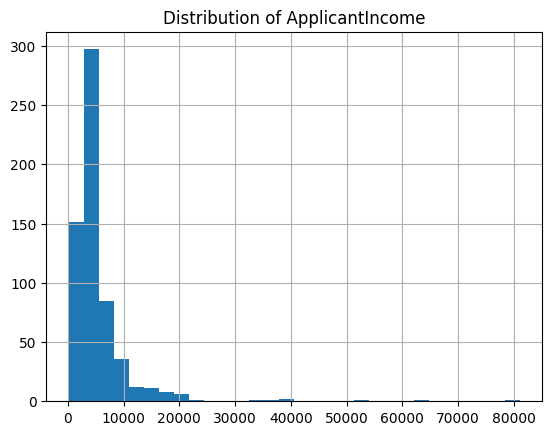

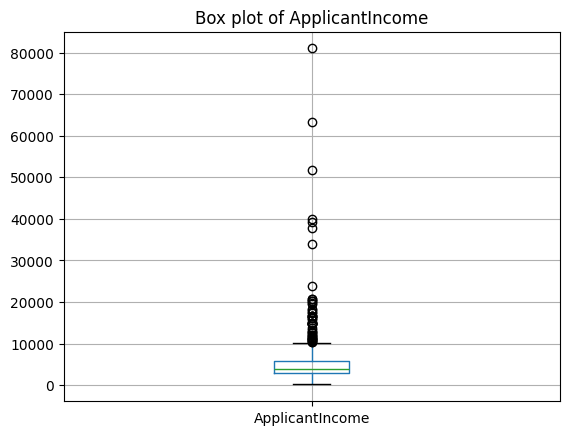

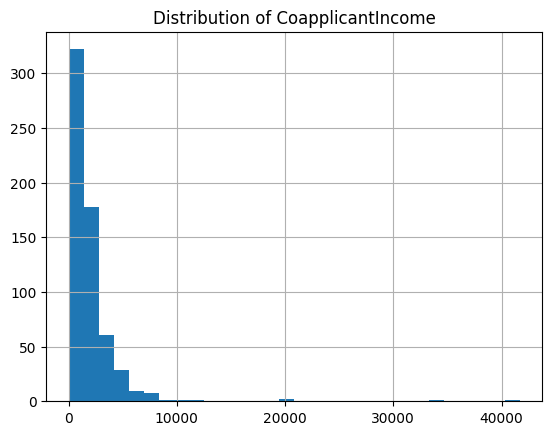

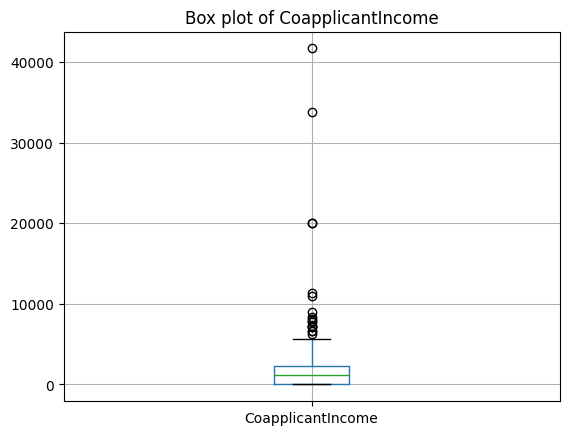

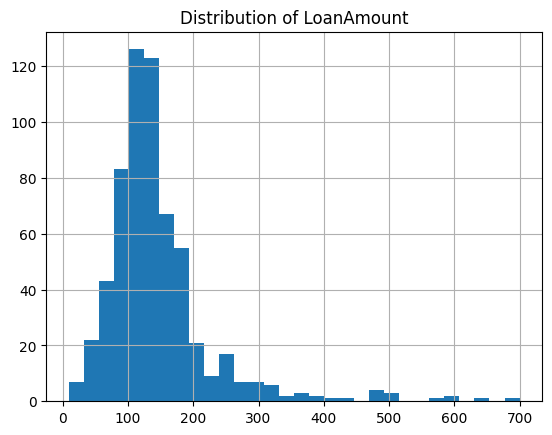

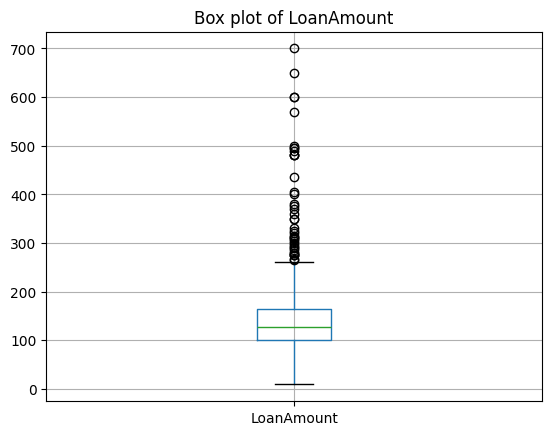

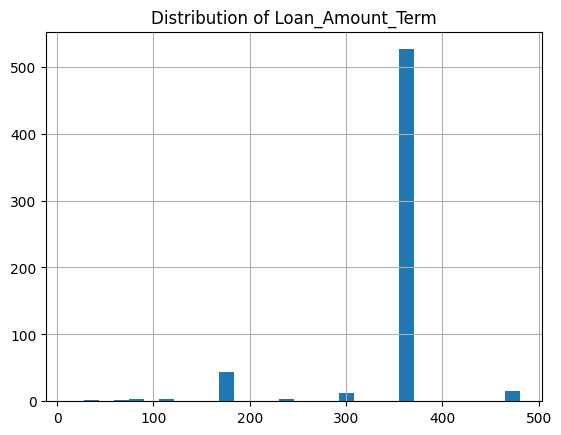

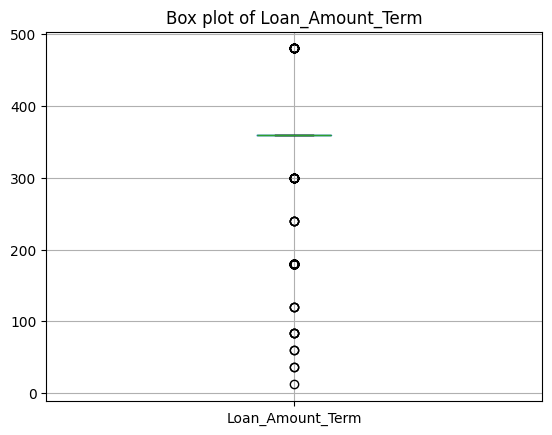

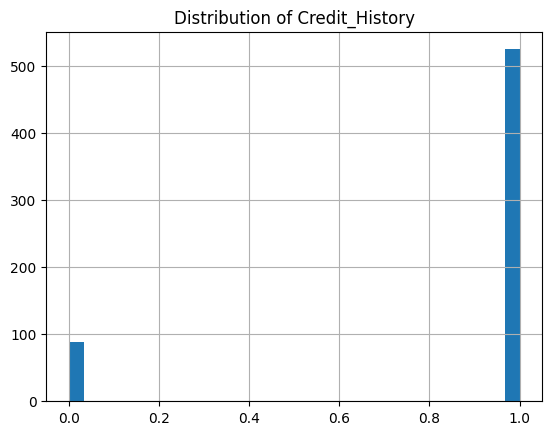

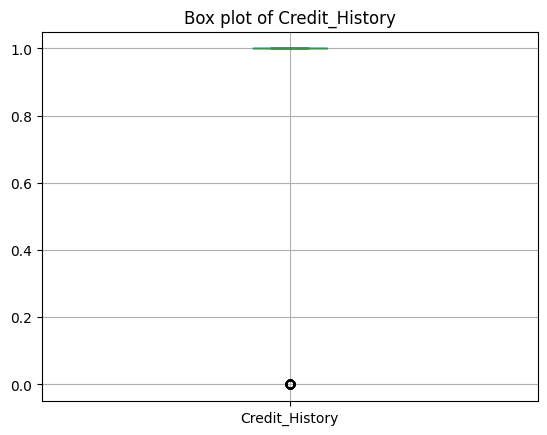

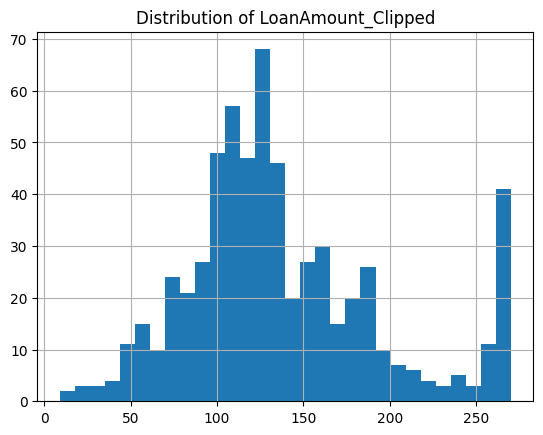

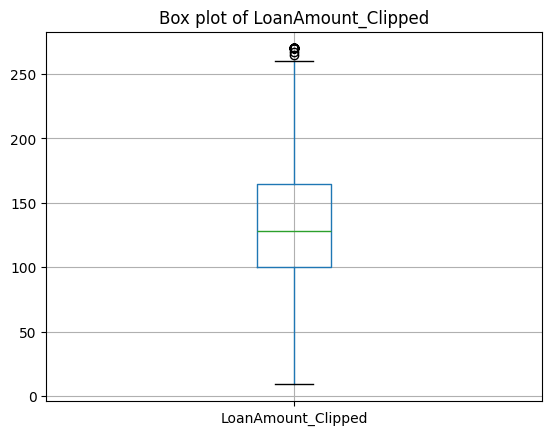

In [33]:
# plotting for all numerical columns
import matplotlib.pyplot as plt

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_Clipped']
for col in numerical_cols:
    train_df[col].hist(bins = 30)
    plt.title(f"Distribution of {col}")
    plt.show()
    train_df.boxplot(column = [col])
    plt.title(f"Box plot of {col}")
    plt.show()

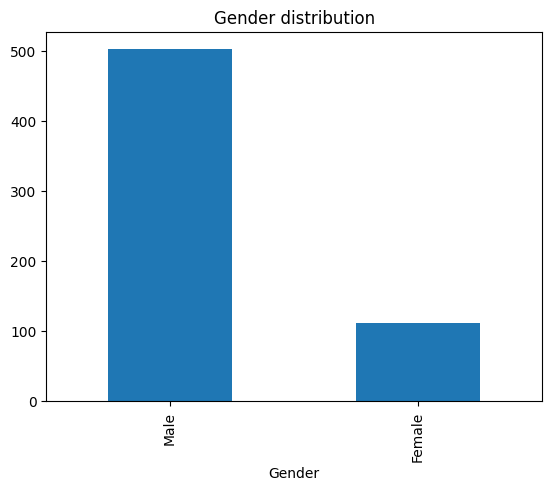

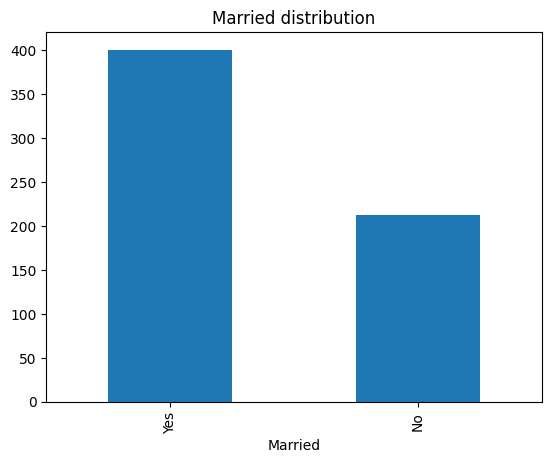

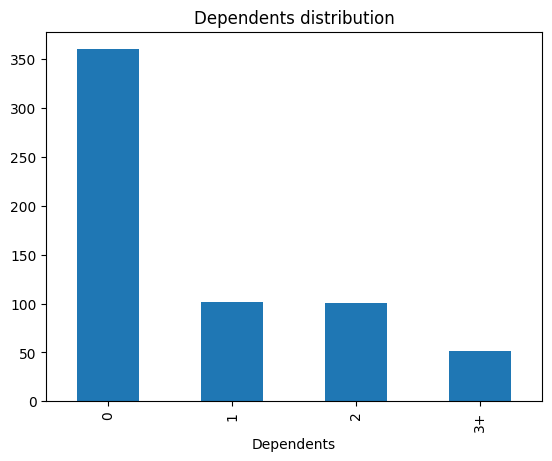

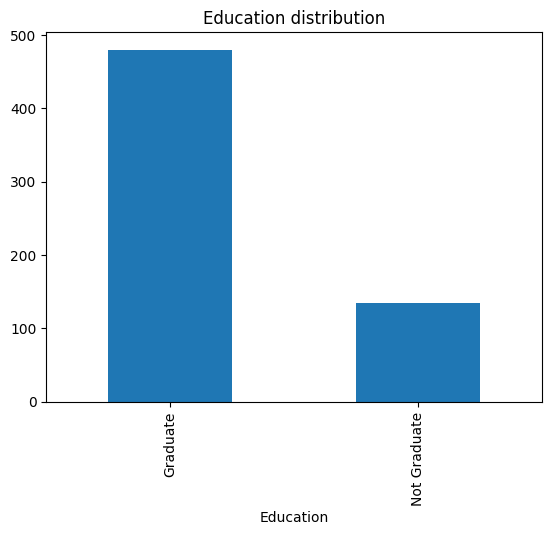

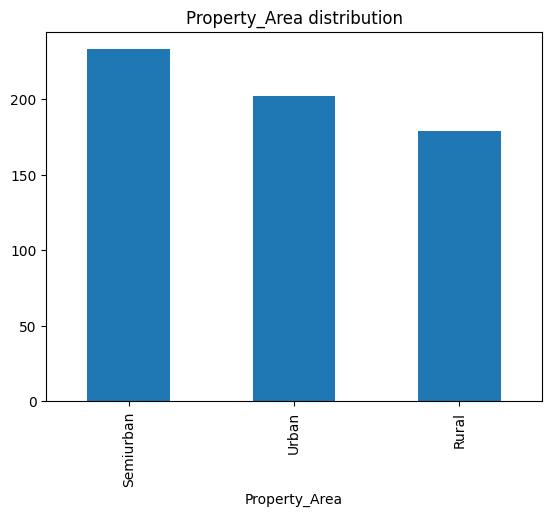

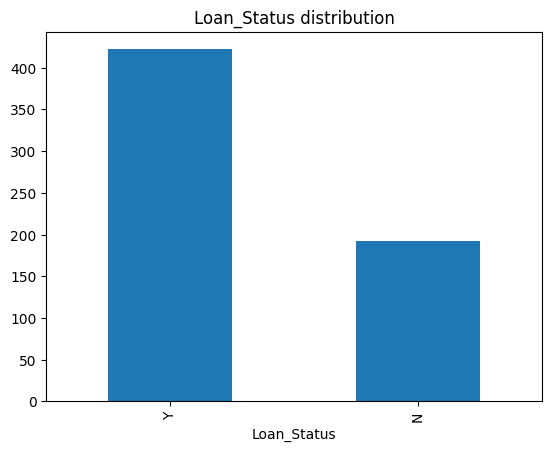

In [34]:
# plotting for all categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    train_df[col].value_counts(dropna = False).plot(kind = 'bar')
    plt.title(f"{col} distribution")
    plt.show()